# STP
## Factor Analysis

In [1]:
import pandas as pd
import numpy as np
!pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=60e92107fcbce7be48275ca7dc99a41d3ee2081a96b6785d62d8c7a221100295
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [ ]:
# Step 0: Read the data
survey_data = pd.read_excel("/content/Athena_survey_data-edited2.xlsx")
survey_data

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,freq.customize,freq.test.world,gg.game.presented,gg.maxprice,rank.WarriorGuild,rank.SeraphGuardians,rank.Evercrest,rank.DevilsGate,rank.Marksman,rank.QuestoftheTitan
0,male,IN,19,20000,4,7,5,7,5,3,...,3,1,Warrior Guild,42.0,2,3,6,4,1,5
1,male,OR,29,80000,5,7,1,4,2,4,...,1,3,Warrior Guild,59.0,3,1,6,4,2,5
2,male,MN,52,91000,4,3,3,4,5,7,...,2,3,Seraph Guardians,74.0,4,1,3,5,6,2
3,female,FL,20,24000,7,3,3,6,5,4,...,2,3,Warrior Guild,38.0,3,1,4,2,5,6
4,female,NM,33,64000,7,6,1,7,1,2,...,1,3,Evercrest,42.0,3,2,5,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,2,5,Evercrest,44.0,1,2,5,3,4,6
2174,male,NY,42,118000,3,7,3,3,6,3,...,1,1,Evercrest,75.0,6,1,3,5,4,2
2175,female,MO,52,97000,6,5,1,5,3,2,...,2,3,Evercrest,63.0,4,2,6,3,1,5
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,2,2,Seraph Guardians,28.0,2,4,6,1,3,5


In [ ]:
print(survey_data.columns[4:44])


Index(['imp.challenge', 'imp.unlocks', 'imp.customize', 'imp.difficulty',
       'imp.characters', 'imp.storyline', 'imp.mastery', 'imp.backstory',
       'imp.dominate', 'imp.completion', 'imp.wealth', 'imp.fantasy',
       'imp.items', 'imp.power', 'imp.offbeat', 'imp.collect',
       'enj.excitement', 'enj.destruction', 'enj.others', 'enj.react',
       'enj.duels', 'enj.strategy', 'enj.roleplay', 'enj.competition',
       'enj.decisions', 'enj.common.goal', 'enj.planning', 'enj.immersion',
       'enj.helping', 'enj.fast', 'enj.guns', 'enj.gore', 'enj.blow.up',
       'freq.explore', 'freq.experiment', 'freq.study', 'freq.char.creation',
       'freq.stats', 'freq.customize', 'freq.test.world'],
      dtype='object')


In [ ]:
# Step 1: Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(survey_data.iloc[:, 4:44])
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(survey_data.iloc[:, 4:44])
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.8903064302758804


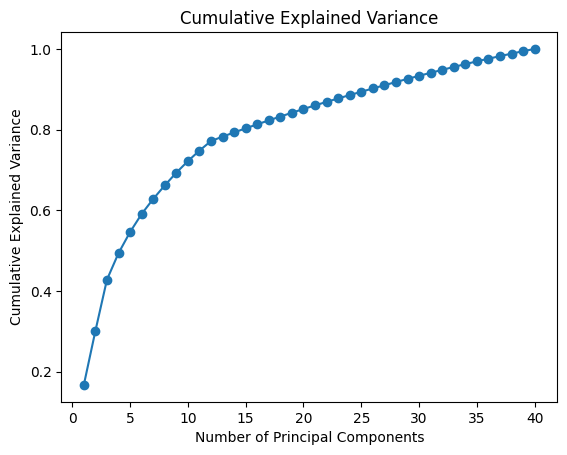

array([6.6930014 , 5.35042033, 5.08654204, 2.63196852, 2.09323499,
       1.79060433, 1.49185008, 1.34244474, 1.26272407, 1.14607329,
       1.04575203, 0.9461203 , 0.43730903, 0.41672851, 0.40923929,
       0.39558531, 0.39151915, 0.37984153, 0.37767606, 0.37204413,
       0.35662305, 0.3502892 , 0.33996429, 0.33292758, 0.32947343,
       0.32751998, 0.32053907, 0.31765556, 0.31178708, 0.30282288,
       0.29923353, 0.29216912, 0.28939193, 0.28204642, 0.2716738 ,
       0.26252222, 0.25701791, 0.24804166, 0.24196581, 0.22403024])

In [ ]:
# Step 2: Determine the number of factors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features (important for PCA)
scaler = StandardScaler()
survey_data_scaled = scaler.fit_transform(survey_data.iloc[:, 4:44])

# Create and fit the PCA model
pca = PCA()
pca.fit(survey_data_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Plot the explained variance ratios, want the factors to explain
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1), \
         cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca.explained_variance_ # eigenvalues; want values > 1

In [ ]:
# Step 3: Extract the factor solution (with varimax rotation)
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis

rotator = Rotator()

fa = FactorAnalysis(n_components=11)
fa.fit(survey_data_scaled)
rotated_loading = rotator.fit_transform(fa.components_.T)

print("Rotated Factor Loadings:")
pd.DataFrame(rotated_loading, columns=['Factor 1', 'Factor 2','Factor 3', 'Factor 4','Factor 5', 'Factor 6','Factor 7','Factor 8', 'Factor 9','Factor 10', 'Factor 11'], index=survey_data.columns[4:44])


Rotated Factor Loadings:


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11
imp.challenge,0.425072,0.007491,0.053897,-0.148200,-0.144482,0.000137,0.087881,0.023573,-0.027669,-0.001777,-0.677377
imp.unlocks,-0.103044,-0.759033,0.088499,-0.135689,0.070300,0.161542,0.000928,0.235759,-0.009678,-0.160529,0.014067
imp.customize,0.002733,-0.011961,-0.096394,-0.096246,-0.114603,-0.005573,-0.220559,-0.022567,0.763657,0.052034,0.031715
imp.difficulty,0.418318,-0.003551,0.080251,-0.136887,-0.137690,0.012850,0.081119,0.020505,-0.031947,0.008110,-0.683742
imp.characters,-0.024772,0.074043,-0.778673,0.044022,-0.077009,-0.030777,-0.308535,0.012829,0.102793,-0.044168,0.032034
imp.storyline,-0.000631,0.079965,-0.760563,0.056150,-0.087919,-0.050181,-0.325084,0.005224,0.131192,-0.070509,0.045702
imp.mastery,0.669933,0.031975,0.037462,-0.113611,-0.167583,-0.017152,0.031774,-0.012753,-0.007764,-0.011835,-0.419271
imp.backstory,-0.029901,0.068085,-0.786485,0.042888,-0.078010,-0.008450,-0.306317,0.000217,0.115964,-0.060089,0.044303
imp.dominate,-0.023356,0.120203,0.049777,0.041391,-0.068661,-0.154191,0.011882,-0.166063,0.057819,0.699448,-0.036650
imp.completion,-0.106218,-0.797111,0.053616,-0.120769,0.070044,0.140648,0.021588,0.209009,0.003189,-0.148145,-0.000087


In [ ]:
# Step 4: Create and name the factor scores
factor_scores = fa.transform(survey_data_scaled)
survey_data['Strategic Thinkers & Mastery Seekers'] = factor_scores[:, 0]
survey_data['Casual & Progress-Oriented Players'] = factor_scores[:, 1]
survey_data['Gameplay-Driven Action Seekers'] = factor_scores[:, 2]
survey_data['Chaos & Destruction Enthusiasts'] = factor_scores[:, 3]
survey_data['Goal-Oriented & Structured Players'] = factor_scores[:, 4]
survey_data['Deliberate & Methodical Players'] = factor_scores[:, 5]
survey_data['Practical & Mechanically-Focused Players'] = factor_scores[:, 6]
survey_data['Independent & Solo-Oriented Players'] = factor_scores[:, 7]
survey_data['Customization & Identity Creators'] = factor_scores[:, 8]
survey_data['Competitive Warriors & PvP Enthusiasts'] = factor_scores[:, 9]
survey_data['Casual & Relaxed Gamers'] = factor_scores[:, 10]
survey_data

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Casual & Progress-Oriented Players,Gameplay-Driven Action Seekers,Chaos & Destruction Enthusiasts,Goal-Oriented & Structured Players,Deliberate & Methodical Players,Practical & Mechanically-Focused Players,Independent & Solo-Oriented Players,Customization & Identity Creators,Competitive Warriors & PvP Enthusiasts,Casual & Relaxed Gamers
0,male,IN,19,20000,4,7,5,7,5,3,...,-1.069365,0.304991,-1.736799,-0.005785,-0.998547,1.045851,-0.786105,-0.890018,-0.031550,-1.622037
1,male,OR,29,80000,5,7,1,4,2,4,...,-0.321623,0.417804,0.345072,-1.888753,-0.112307,-1.411236,-0.065405,-1.469777,0.520904,0.303790
2,male,MN,52,91000,4,3,3,4,5,7,...,-0.611355,-1.339602,0.250252,0.959893,1.382249,-1.215634,-0.163678,0.108735,-0.074610,-0.662534
3,female,FL,20,24000,7,3,3,6,5,4,...,0.371747,1.673307,-0.586875,1.381628,-0.195424,-1.306300,-0.633214,-0.644074,0.975141,0.815366
4,female,NM,33,64000,7,6,1,7,1,2,...,-1.062189,1.999858,0.793975,-0.017496,-0.526162,-1.174895,-0.113353,0.028005,-0.375355,-0.861562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,-0.032388,1.399148,-0.765368,0.053153,1.853163,1.018910,0.363882,-1.096099,-0.424239,-0.375751
2174,male,NY,42,118000,3,7,3,3,6,3,...,-2.000734,-0.151384,-0.577538,1.195290,0.543921,0.059723,-0.074856,-0.772996,-0.528863,0.729306
2175,female,MO,52,97000,6,5,1,5,3,2,...,-0.721416,1.853729,0.868332,-0.286732,1.124193,0.374876,0.984215,0.387760,0.348958,0.087454
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,1.391650,0.705834,-0.690848,-0.563138,-0.577827,-0.748499,0.496216,1.069095,-0.058206,1.500282


## Cluster Analysis

<ipython-input-86-91cc8f80d728>:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dissimilarity_matrix, method="ward")


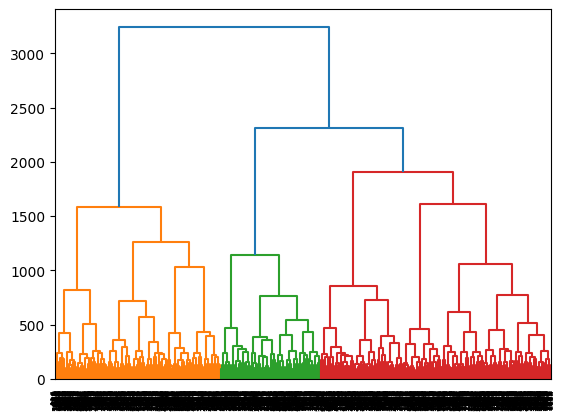

In [ ]:
# Step 1: determine the number of clusters
# Option A: dendogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
dissimilarity_matrix = squareform(pdist(survey_data.iloc[:, 4:44], metric='euclidean'))

# perform hierarchical clustering using Ward's method on this matrix
hc = linkage(dissimilarity_matrix, method="ward")

# plot the resulting dendrogram
dendrogram(hc, leaf_font_size=6)
plt.show()

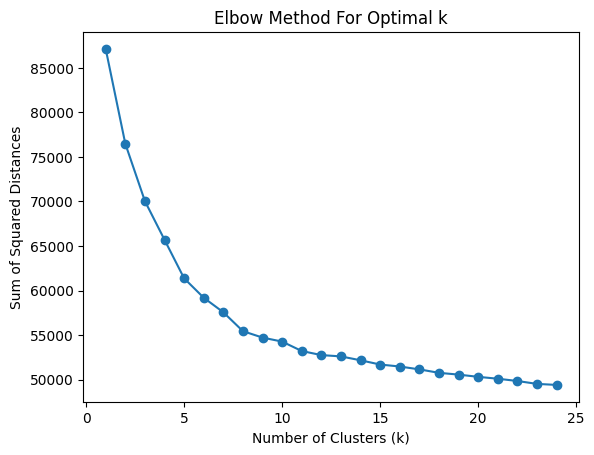

In [ ]:
# Option B: The Elbow
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 25)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(survey_data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [ ]:
# Step 2: Calculate the final cluster solution
kmeans = KMeans(n_clusters=5, random_state=11, n_init='auto')

# Add a new column with cluster assignment for each person
survey_data['Cluster'] = kmeans.fit_predict(survey_data.iloc[:, 4:44])
survey_data

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Gameplay-Driven Action Seekers,Chaos & Destruction Enthusiasts,Goal-Oriented & Structured Players,Deliberate & Methodical Players,Practical & Mechanically-Focused Players,Independent & Solo-Oriented Players,Customization & Identity Creators,Competitive Warriors & PvP Enthusiasts,Casual & Relaxed Gamers,Cluster
0,male,IN,19,20000,4,7,5,7,5,3,...,0.304991,-1.736799,-0.005785,-0.998547,1.045851,-0.786105,-0.890018,-0.031550,-1.622037,2
1,male,OR,29,80000,5,7,1,4,2,4,...,0.417804,0.345072,-1.888753,-0.112307,-1.411236,-0.065405,-1.469777,0.520904,0.303790,2
2,male,MN,52,91000,4,3,3,4,5,7,...,-1.339602,0.250252,0.959893,1.382249,-1.215634,-0.163678,0.108735,-0.074610,-0.662534,1
3,female,FL,20,24000,7,3,3,6,5,4,...,1.673307,-0.586875,1.381628,-0.195424,-1.306300,-0.633214,-0.644074,0.975141,0.815366,4
4,female,NM,33,64000,7,6,1,7,1,2,...,1.999858,0.793975,-0.017496,-0.526162,-1.174895,-0.113353,0.028005,-0.375355,-0.861562,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,1.399148,-0.765368,0.053153,1.853163,1.018910,0.363882,-1.096099,-0.424239,-0.375751,4
2174,male,NY,42,118000,3,7,3,3,6,3,...,-0.151384,-0.577538,1.195290,0.543921,0.059723,-0.074856,-0.772996,-0.528863,0.729306,2
2175,female,MO,52,97000,6,5,1,5,3,2,...,1.853729,0.868332,-0.286732,1.124193,0.374876,0.984215,0.387760,0.348958,0.087454,4
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,0.705834,-0.690848,-0.563138,-0.577827,-0.748499,0.496216,1.069095,-0.058206,1.500282,0


In [ ]:
# Step 3: Interpret the K-means output
print("Cluster Centers:")
pd.DataFrame(kmeans.cluster_centers_, columns=survey_data.columns[4:44], \
             index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'], )

Cluster Centers:


,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,imp.mastery,imp.backstory,imp.dominate,imp.completion,...,enj.guns,enj.gore,enj.blow.up,freq.explore,freq.experiment,freq.study,freq.char.creation,freq.stats,freq.customize,freq.test.world
Cluster 0,3.176252,3.174397,2.647495,3.126160,4.730983,4.742115,2.946197,4.730983,4.289425,3.237477,...,5.525046,5.606679,5.575139,2.677180,2.630798,3.003711,2.673469,3.178108,2.701299,2.779221
Cluster 1,3.991914,5.172507,4.013477,3.919137,5.741240,5.816712,3.805930,5.757412,2.924528,5.156334,...,2.943396,2.851752,2.838275,3.991914,3.962264,3.873315,4.018868,4.867925,4.005391,3.894879
Cluster 2,3.234957,5.925501,3.200573,3.309456,3.309456,3.229226,2.770774,3.338109,3.295129,5.942693,...,3.263610,3.194842,3.266476,1.982808,1.962751,2.830946,3.123209,3.203438,3.189112,1.936963
Cluster 3,4.673516,2.869863,4.283105,4.566210,5.698630,5.630137,4.742009,5.680365,4.426941,2.965753,...,3.189498,3.230594,3.221461,4.687215,4.817352,4.810502,4.205479,3.470320,4.267123,4.794521
Cluster 4,5.661123,3.900208,2.288981,5.619543,2.985447,3.054054,5.361746,2.993763,3.638254,3.802495,...,3.174636,3.276507,3.170478,3.523909,3.434511,5.361746,2.355509,3.182952,2.357588,3.469854


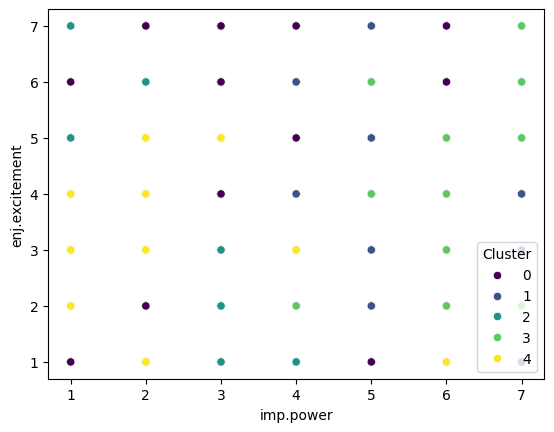

In [ ]:
# Visualize K-means clusters
import seaborn as sns

sns.scatterplot(data=survey_data, x='imp.power', y='enj.excitement', hue='Cluster', palette='viridis')
plt.show()

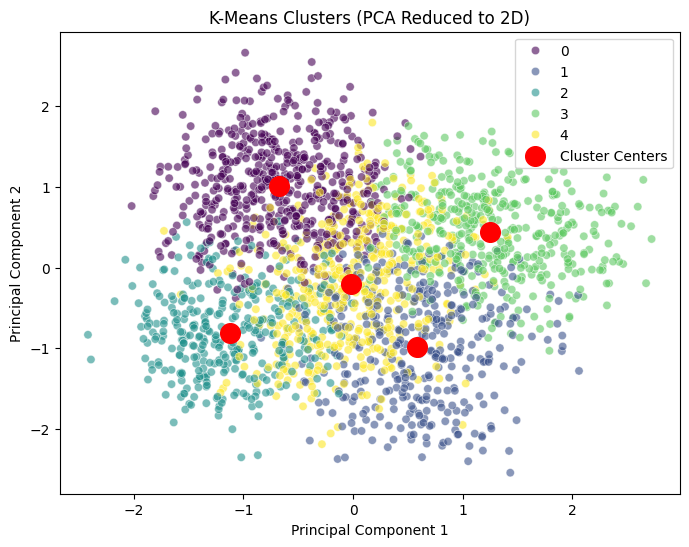

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Your list of features
features = ['Strategic Thinkers & Mastery Seekers',
'Casual & Progress-Oriented Players',
'Gameplay-Driven Action Seekers',
'Chaos & Destruction Enthusiasts',
'Goal-Oriented & Structured Players',
'Deliberate & Methodical Players',
'Practical & Mechanically-Focused Players',
'Independent & Solo-Oriented Players',
'Customization & Identity Creators',
'Competitive Warriors & PvP Enthusiasts',
'Casual & Relaxed Gamers']

# Perform PCA
pca = PCA(n_components=2)
pca_factors = pca.fit_transform(survey_data[features])

# Create DataFrame with PCA components
survey_pca = pd.DataFrame(pca_factors, columns=['PC1', 'PC2'])
survey_pca['Cluster'] = survey_data['Cluster']

# Compute cluster centers
cluster_centers = survey_pca.groupby('Cluster')[['PC1', 'PC2']].mean()

# Scatterplot with PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(data=survey_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.6)


# Plot cluster centers
plt.scatter(cluster_centers['PC1'], cluster_centers['PC2'],
            marker='o', s=200, color='red', edgecolors='Red', label='Cluster Centers')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Reduced to 2D)")
plt.legend()
plt.show()


In [ ]:
# Mapping all factors to their respective clusters by identifying the highest value per factor
factor_cluster_mapping = survey_data.groupby('Cluster')[features].mean().idxmax()

# Convert to a DataFrame for better visualization
factor_cluster_df = pd.DataFrame(factor_cluster_mapping, columns=['Assigned Cluster'])

# Display the factor-to-cluster mapping
print(factor_cluster_df)


                                          Assigned Cluster
Strategic Thinkers & Mastery Seekers                     3
Casual & Progress-Oriented Players                       0
Gameplay-Driven Action Seekers                           4
Chaos & Destruction Enthusiasts                          0
Goal-Oriented & Structured Players                       4
Deliberate & Methodical Players                          3
Practical & Mechanically-Focused Players                 3
Independent & Solo-Oriented Players                      1
Customization & Identity Creators                        2
Competitive Warriors & PvP Enthusiasts                   0
Casual & Relaxed Gamers                                  1


In [ ]:
# Identifying the most relevant factors for each cluster by selecting the top 3 highest values per cluster
top_factors_per_cluster = survey_data.groupby('Cluster')[features].mean().apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Convert to a DataFrame for better visualization
top_factors_df = pd.DataFrame(top_factors_per_cluster.tolist(),
                              columns=['Top Factor 1', 'Top Factor 2', 'Top Factor 3'],
                              index=[f'Cluster {i}' for i in range(len(top_factors_per_cluster))])

# Display the most relevant factors per cluster
print(top_factors_df)


                                   Top Factor 1  \
Cluster 0    Casual & Progress-Oriented Players   
Cluster 1  Strategic Thinkers & Mastery Seekers   
Cluster 2     Customization & Identity Creators   
Cluster 3  Strategic Thinkers & Mastery Seekers   
Cluster 4        Gameplay-Driven Action Seekers   

                                     Top Factor 2  \
Cluster 0         Chaos & Destruction Enthusiasts   
Cluster 1         Chaos & Destruction Enthusiasts   
Cluster 2  Competitive Warriors & PvP Enthusiasts   
Cluster 3      Casual & Progress-Oriented Players   
Cluster 4      Goal-Oriented & Structured Players   

                                     Top Factor 3  
Cluster 0  Competitive Warriors & PvP Enthusiasts  
Cluster 1     Independent & Solo-Oriented Players  
Cluster 2                 Casual & Relaxed Gamers  
Cluster 3         Deliberate & Methodical Players  
Cluster 4     Independent & Solo-Oriented Players  


In [ ]:
# Step 5: Add labels to the clusters
#survey_data['Segment_Label'] = survey_data['Cluster'].replace({0: 'Casual & PvP-Oriented Players', 1: 'Strategic & Social Gamers', 2: 'Immersive & Creative Players', 3: 'Progress-Oriented & Narrative Gamers'})
#survey_data.head()

In [ ]:
# Step 5: Add labels to the clusters
survey_data['Segment_Label'] = survey_data['Cluster'].replace({
   0: 'Strategic Thinkers & Mastery Seekers',
    1: 'Casual & Progress-Oriented Players',
    2: 'Gameplay-Driven Action Seekers',
    3: 'Chaos & Destruction Enthusiasts',
    4: 'Goal-Oriented & Structured Players'  # New cluster added
})
survey_data.head()

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Chaos & Destruction Enthusiasts,Goal-Oriented & Structured Players,Deliberate & Methodical Players,Practical & Mechanically-Focused Players,Independent & Solo-Oriented Players,Customization & Identity Creators,Competitive Warriors & PvP Enthusiasts,Casual & Relaxed Gamers,Cluster,Segment_Label
0,male,IN,19,20000,4,7,5,7,5,3,...,-1.736799,-0.005785,-0.998547,1.045851,-0.786105,-0.890018,-0.031550,-1.622037,2,Gameplay-Driven Action Seekers
1,male,OR,29,80000,5,7,1,4,2,4,...,0.345072,-1.888753,-0.112307,-1.411236,-0.065405,-1.469777,0.520904,0.303790,2,Gameplay-Driven Action Seekers
2,male,MN,52,91000,4,3,3,4,5,7,...,0.250252,0.959893,1.382249,-1.215634,-0.163678,0.108735,-0.074610,-0.662534,1,Casual & Progress-Oriented Players
3,female,FL,20,24000,7,3,3,6,5,4,...,-0.586875,1.381628,-0.195424,-1.306300,-0.633214,-0.644074,0.975141,0.815366,4,Goal-Oriented & Structured Players
4,female,NM,33,64000,7,6,1,7,1,2,...,0.793975,-0.017496,-0.526162,-1.174895,-0.113353,0.028005,-0.375355,-0.861562,4,Goal-Oriented & Structured Players


In [ ]:
# Assign segment labels to clusters based on top factors
survey_data['Segment_Label'] = survey_data['Cluster'].replace({
    0: 'Strategic Thinkers & Mastery Seekers',
    1: 'Casual & Progress-Oriented Players',
    2: 'Gameplay-Driven Action Seekers',
    3: 'Chaos & Destruction Enthusiasts',
    4: 'Goal-Oriented & Structured Players'
})

print(survey_data[['Cluster', 'Segment_Label']])


      Cluster                         Segment_Label
0           2        Gameplay-Driven Action Seekers
1           2        Gameplay-Driven Action Seekers
2           1    Casual & Progress-Oriented Players
3           4    Goal-Oriented & Structured Players
4           4    Goal-Oriented & Structured Players
...       ...                                   ...
2173        4    Goal-Oriented & Structured Players
2174        2        Gameplay-Driven Action Seekers
2175        4    Goal-Oriented & Structured Players
2176        0  Strategic Thinkers & Mastery Seekers
2177        1    Casual & Progress-Oriented Players

[2178 rows x 2 columns]


## Using FA & CA together
What you need to do: re-run everything for FA then modify the cluster analysis to use the
**factor scores** instead of the **survey responses**.  Do the result differ?

After you finish segmenting customers, identify which segments(s) to target for the toothpaste
(hint: run linear regression with `liking` as the outcome variable).

# Cross Tabs and Regression


In [ ]:
import pandas as pd

# Cross-tabulation: Relationship between Segments and Gender
gender_crosstab = pd.crosstab(survey_data['Segment_Label'], survey_data['gender'], normalize='index') * 100

# Display gender distribution per segment
print("Gender Distribution Across Segments:")
print(gender_crosstab)


Gender Distribution Across Segments:
gender                                   female       male  nonbinary
Segment_Label                                                        
Casual & Progress-Oriented Players    50.673854  48.517520   0.808625
Chaos & Destruction Enthusiasts       51.826484  47.945205   0.228311
Gameplay-Driven Action Seekers        55.873926  43.266476   0.859599
Goal-Oriented & Structured Players    41.372141  57.588358   1.039501
Strategic Thinkers & Mastery Seekers  35.621521  63.821892   0.556586


In [ ]:
# Summary statistics for Age and Income per segment
demographic_summary = survey_data.groupby('Segment_Label')[['age', 'income']].agg(['mean', 'std', 'count'])

# Display demographic summary per segment
print("Demographic Summary Per Segment:")
print(demographic_summary)


Demographic Summary Per Segment:
                                            age                   \
                                           mean        std count   
Segment_Label                                                      
Casual & Progress-Oriented Players    36.326146  13.307338   371   
Chaos & Destruction Enthusiasts       22.856164   4.368060   438   
Gameplay-Driven Action Seekers        28.518625   8.966914   349   
Goal-Oriented & Structured Players    29.230769   9.595505   481   
Strategic Thinkers & Mastery Seekers  24.246753   6.796864   539   

                                            income                      
                                              mean           std count  
Segment_Label                                                           
Casual & Progress-Oriented Players    69175.202156  34798.944216   371  
Chaos & Destruction Enthusiasts       36509.132420  23661.778866   438  
Gameplay-Driven Action Seekers        53593.123209  30812

In [ ]:
factors = [
    'Strategic Thinkers & Mastery Seekers',
'Casual & Progress-Oriented Players',
'Gameplay-Driven Action Seekers',
'Chaos & Destruction Enthusiasts',
'Goal-Oriented & Structured Players',
'Deliberate & Methodical Players',
'Practical & Mechanically-Focused Players',
'Independent & Solo-Oriented Players',
'Customization & Identity Creators',
'Competitive Warriors & PvP Enthusiasts',
'Casual & Relaxed Gamers'
]

# Group by 'Cluster' and compute the mean weightage of each factor
cluster_factors = survey_data.groupby("Cluster")[factors].mean()

# Transpose the DataFrame to have factors on the Y-axis and clusters as columns
cluster_factors_transposed = cluster_factors.T

# Display the full table
print(cluster_factors_transposed)

Cluster                                          0         1         2  \
Strategic Thinkers & Mastery Seekers     -0.675056  0.585080 -1.122991   
Casual & Progress-Oriented Players        1.015274 -0.980622 -0.804665   
Gameplay-Driven Action Seekers           -0.353813 -0.883168 -0.201102   
Chaos & Destruction Enthusiasts           0.376316  0.340559 -0.702629   
Goal-Oriented & Structured Players       -0.118793 -0.136155 -0.022058   
Deliberate & Methodical Players          -0.054692 -0.164078 -0.119384   
Practical & Mechanically-Focused Players  0.021062  0.020151 -0.013388   
Independent & Solo-Oriented Players       0.020962  0.232017 -0.143587   
Customization & Identity Creators        -0.107316  0.003129  0.134259   
Competitive Warriors & PvP Enthusiasts    0.042312  0.026830  0.004315   
Casual & Relaxed Gamers                   0.024071  0.046822 -0.008031   

Cluster                                          3         4  
Strategic Thinkers & Mastery Seekers      1.2498

In [ ]:
import statsmodels.api as sm

# Independent variables (age, income)
X = survey_data[['age', 'income']]
X = sm.add_constant(X)  # Add constant for intercept

# Dependent variable (Segment Membership)
y = survey_data['Cluster']

# Fit a multinomial logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

# Display regression summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 1.477846
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                Cluster   No. Observations:                 2178
Model:                        MNLogit   Df Residuals:                     2166
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Feb 2025   Pseudo R-squ.:                 0.07437
Time:                        03:47:57   Log-Likelihood:                -3218.7
converged:                       True   LL-Null:                       -3477.4
Covariance Type:            nonrobust   LLR p-value:                1.402e-106
 Cluster=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3346      0.297    -14.616      0.000      -4.916      -3.753
age            0.1442      0.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Cross-tabulation: Relationship between Segments (Clusters) and Gender
gender_crosstab = pd.crosstab(survey_data['Cluster'], survey_data['gender'], normalize='index') * 100

# Cross-tabulation: Relationship between Segments (Clusters) and State (Location)
state_crosstab = pd.crosstab(survey_data['Cluster'], survey_data['state'], normalize='index') * 100

# Summary statistics for Age and Income per segment
demographic_summary = survey_data.groupby('Cluster')[['age', 'income']].agg(['mean', 'std', 'count'])

# Define independent variables (age and income) for regression
X = survey_data[['age', 'income']]
X = sm.add_constant(X)  # Add constant for intercept

# Define dependent variable (Cluster membership)
y = survey_data['Cluster']

# Fit a multinomial logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

# Display results using print() and display()
print("\n### Gender Cross-tabulation ###")
print(gender_crosstab)

print("\n### State Cross-tabulation ###")
print(state_crosstab)

print("\n### Demographic Summary (Mean Age & Income per Cluster) ###")
print(demographic_summary)

print("\n### Regression Analysis Summary ###")
print(result.summary())



Optimization terminated successfully.
         Current function value: 1.477846
         Iterations 7

### Gender Cross-tabulation ###
gender      female       male  nonbinary
Cluster                                 
0        35.621521  63.821892   0.556586
1        50.673854  48.517520   0.808625
2        55.873926  43.266476   0.859599
3        51.826484  47.945205   0.228311
4        41.372141  57.588358   1.039501

### State Cross-tabulation ###
state          AK        AL        AR        AZ         CA        CO  \
Cluster                                                                
0        0.185529  1.298701  1.113173  1.484230  12.801484  1.855288   
1        0.539084  1.617251  1.617251  1.886792   9.433962  1.617251   
2        0.000000  1.432665  0.859599  2.578797  13.467049  0.859599   
3        0.684932  1.369863  0.684932  3.196347  10.730594  1.369863   
4        0.415800  1.039501  1.247401  0.831601  11.226611  2.286902   

state          CT        DE        FL    

In [ ]:
# Define the mapping of states to U.S. regions
state_to_region = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',

    # South
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'DC': 'South', 'FL': 'South',
    'GA': 'South', 'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South',
    'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South',
    'VA': 'South', 'WV': 'South',

    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West',
    'UT': 'West', 'WA': 'West', 'WY': 'West'
}

# Map state column to region
survey_data['Region'] = survey_data['state'].map(state_to_region)

# Perform cross-tabulation for Region
region_crosstab = pd.crosstab(survey_data['Cluster'], survey_data['Region'], normalize='index') * 100

# Display the new cross-tabulation for regions
print("\n### Region Cross-tabulation ###")
print(region_crosstab)



### Region Cross-tabulation ###
Region     Midwest  Northeast      South       West
Cluster                                            
0        18.181818  19.109462  38.589981  24.118738
1        27.762803  13.477089  38.005391  20.754717
2        20.343840  15.472779  39.541547  24.641834
3        21.917808  16.210046  36.757991  25.114155
4        21.621622  17.047817  37.629938  23.700624


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define demographic attributes
demographics = ['gender', 'age', 'income', 'Region']  # Use 'Region' instead of 'state'
segments = 'Cluster'  # Assuming 'Cluster' is the column containing segment labels (0, 1, 2, 3)

# Create a dictionary to store results
results = {}

# Loop through each demographic attribute and perform crosstab & chi-squared test
for attr in demographics:
    print(f"\nCross Tabulation: {segments} vs {attr}")
    crosstab = pd.crosstab(index=survey_data[segments], columns=survey_data[attr])
    display(crosstab)  # Show the crosstab

    # Chi-squared test
    chi2, p, _, expected = chi2_contingency(crosstab)
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")

    # Store results
    results[attr] = {
        "crosstab": crosstab,
        "chi2": chi2,
        "p-value": p,
        "expected": pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns)
    }

    print("\nExpected Values:")
    display(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))

    # Chi-squared contributions
    contributions = (crosstab - expected) ** 2 / expected
    print("\nChi-squared Contributions:")
    display(contributions)



Cross Tabulation: Cluster vs gender


gender,female,male,nonbinary
Cluster,,,
0,192,344,3
1,188,180,3
2,195,151,3
3,227,210,1
4,199,277,5


Chi-squared value: 53.21612523336091
P-value: 9.794198315431064e-09

Expected Values:


gender,female,male,nonbinary
Cluster,,,
0,247.722222,287.565657,3.712121
1,170.510101,197.934803,2.555096
2,160.398990,186.197429,2.403581
3,201.303030,233.680441,3.016529
4,221.065657,256.621671,3.312672



Chi-squared Contributions:


gender,female,male,nonbinary
Cluster,,,
0,12.534063,11.075158,0.136611
1,1.794008,1.625066,0.077468
2,7.464074,6.653470,0.147994
3,3.280300,2.399701,1.348036
4,2.202482,1.618243,0.859450



Cross Tabulation: Cluster vs age


age,18,19,20,21,22,23,24,25,26,27,...,56,57,58,59,60,61,62,63,64,65
Cluster,,,,,,,,,,,,,,,,,,,,,
0,67,67,57,38,43,46,31,28,25,19,...,0,1,1,0,0,1,1,0,1,0
1,3,12,7,12,9,18,17,9,12,21,...,7,8,8,8,1,3,4,9,3,3
2,20,18,13,24,17,19,26,16,25,22,...,0,0,0,2,0,0,0,1,1,1
3,49,56,39,56,58,32,34,20,17,16,...,0,0,0,0,0,0,0,0,0,0
4,17,21,30,37,25,32,26,23,22,24,...,1,0,0,1,0,2,2,3,2,0


Chi-squared value: 708.6235216509866
P-value: 1.930228999251602e-61

Expected Values:


age,18,19,20,21,22,23,24,25,26,27,...,56,57,58,59,60,61,62,63,64,65
Cluster,,,,,,,,,,,,,,,,,,,,,
0,38.606061,43.060606,36.131313,41.328283,37.616162,36.378788,33.161616,23.757576,24.994949,25.242424,...,1.979798,2.227273,2.227273,2.722222,0.247475,1.484848,1.732323,3.217172,1.732323,0.989899
1,26.573003,29.639118,24.869605,28.446740,25.891644,25.039945,22.825528,16.352617,17.204316,17.374656,...,1.362718,1.533058,1.533058,1.873737,0.170340,1.022039,1.192378,2.214417,1.192378,0.681359
2,24.997245,27.881543,23.394858,26.759871,24.356290,23.555096,21.471993,15.382920,16.184114,16.344353,...,1.281910,1.442149,1.442149,1.762626,0.160239,0.961433,1.121671,2.083104,1.121671,0.640955
3,31.371901,34.991736,29.360882,33.584022,30.567493,29.561983,26.947658,19.305785,20.311295,20.512397,...,1.608815,1.809917,1.809917,2.212121,0.201102,1.206612,1.407713,2.614325,1.407713,0.804408
4,34.451791,38.426997,32.243343,36.881084,33.568411,32.464187,29.593205,21.201102,22.305326,22.526171,...,1.766758,1.987603,1.987603,2.429293,0.220845,1.325069,1.545914,2.870983,1.545914,0.883379



Chi-squared Contributions:


age,18,19,20,21,22,23,24,25,26,27,...,56,57,58,59,60,61,62,63,64,65
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.883141,13.309023,12.053315,0.268036,0.770565,2.544552,0.140903,0.757576,0.000001,1.543745,...,1.979798,0.676252,0.676252,2.722222,0.247475,0.158318,0.309583,3.217172,0.309583,0.989899
1,20.911692,10.497563,12.839882,9.508832,11.020066,1.979270,1.486790,3.305953,1.574309,0.756454,...,23.320265,27.279689,27.279689,20.030072,4.040960,3.827968,6.610938,20.792895,2.740318,7.890254
2,0.999008,3.502134,4.618667,0.284639,2.221808,0.880867,0.954865,0.024754,4.802231,1.957027,...,1.281910,1.442149,1.442149,0.031967,0.160239,0.961433,1.121671,0.563157,0.013198,0.201127
3,9.905357,12.612898,3.164503,14.961760,24.619043,0.201067,1.845634,0.024963,0.539831,0.992655,...,1.608815,1.809917,1.809917,2.212121,0.201102,1.206612,1.407713,2.614325,1.407713,0.804408
4,8.840324,7.903304,0.156081,0.000383,2.187106,0.006637,0.436287,0.152635,0.004179,0.096429,...,0.332767,1.987603,1.987603,0.840935,0.220845,0.343780,0.133380,0.005798,0.133380,0.883379



Cross Tabulation: Cluster vs income


income,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,...,174000,175000,176000,180000,185000,186000,190000,198000,215000,239000
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,5,9,4,5,8,8,15,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,2,1,...,1,0,1,1,0,1,0,0,1,1
2,0,0,1,4,1,0,2,0,4,3,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,3,3,7,3,12,6,9,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,1,2,2,1,7,...,0,0,0,0,1,0,1,1,0,0


Chi-squared value: 924.1282164214015
P-value: 2.4380871875135277e-13

Expected Values:


income,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,...,174000,175000,176000,180000,185000,186000,190000,198000,215000,239000
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.247475,0.247475,1.237374,3.464646,3.959596,3.217172,2.969697,5.444444,5.196970,8.661616,...,0.494949,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475
1,0.170340,0.170340,0.851699,2.384757,2.725436,2.214417,2.044077,3.747475,3.577135,5.961892,...,0.340680,0.170340,0.170340,0.170340,0.170340,0.170340,0.170340,0.170340,0.170340,0.170340
2,0.160239,0.160239,0.801194,2.243343,2.563820,2.083104,1.922865,3.525253,3.365014,5.608356,...,0.320478,0.160239,0.160239,0.160239,0.160239,0.160239,0.160239,0.160239,0.160239,0.160239
3,0.201102,0.201102,1.005510,2.815427,3.217631,2.614325,2.413223,4.424242,4.223140,7.038567,...,0.402204,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102
4,0.220845,0.220845,1.104224,3.091827,3.533517,2.870983,2.650138,4.858586,4.637741,7.729568,...,0.441690,0.220845,0.220845,0.220845,0.220845,0.220845,0.220845,0.220845,0.220845,0.220845



Chi-squared Contributions:


income,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,...,174000,175000,176000,180000,185000,186000,190000,198000,215000,239000
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.288291,2.288291,1.237374,0.680390,6.416229,0.190484,1.388064,1.199546,1.511839,4.638293,...,0.515358,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475,0.247475
1,0.170340,0.170340,0.851699,0.804087,2.725436,0.666003,2.044077,3.747475,0.695348,4.129624,...,1.275989,0.170340,4.040960,4.040960,0.170340,4.040960,0.170340,0.170340,4.040960,4.040960
2,0.160239,0.160239,0.049331,1.375557,0.953863,2.083104,0.003094,3.525253,0.119823,1.213105,...,0.320478,4.400926,0.160239,0.160239,0.160239,0.160239,0.160239,0.160239,0.160239,0.160239
3,0.201102,0.201102,0.000030,0.012100,0.014720,7.357212,0.142675,12.972188,0.747602,0.546591,...,0.402204,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102,0.201102
4,0.220845,0.220845,3.254744,1.415261,0.080554,1.219295,0.159493,1.681871,2.853363,0.068862,...,0.441690,0.220845,0.220845,0.220845,2.748911,0.220845,2.748911,2.748911,0.220845,0.220845



Cross Tabulation: Cluster vs Region


Region,Midwest,Northeast,South,West
Cluster,,,,
0,98,103,208,130
1,103,50,141,77
2,71,54,138,86
3,96,71,161,110
4,104,82,181,114


Chi-squared value: 16.633897235464676
P-value: 0.16389548196351147

Expected Values:


Region,Midwest,Northeast,South,West
Cluster,,,,
0,116.808081,89.090909,205.156566,127.944444
1,80.400367,61.322314,141.211662,88.065657
2,75.632691,57.685950,132.837925,82.843434
3,94.920110,72.396694,166.713499,103.969697
4,104.238751,79.504132,183.080349,114.176768



Chi-squared Contributions:


Region,Midwest,Northeast,South,West
Cluster,,,,
0,3.028420,2.171521,0.039410,0.033025
1,6.352501,2.090508,0.000317,1.390426
2,0.283764,0.235521,0.200598,0.120274
3,0.012286,0.026945,0.195809,0.349761
4,0.000547,0.078353,0.023639,0.000274


# Question 4

<ipython-input-71-67e44f6298d7>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({


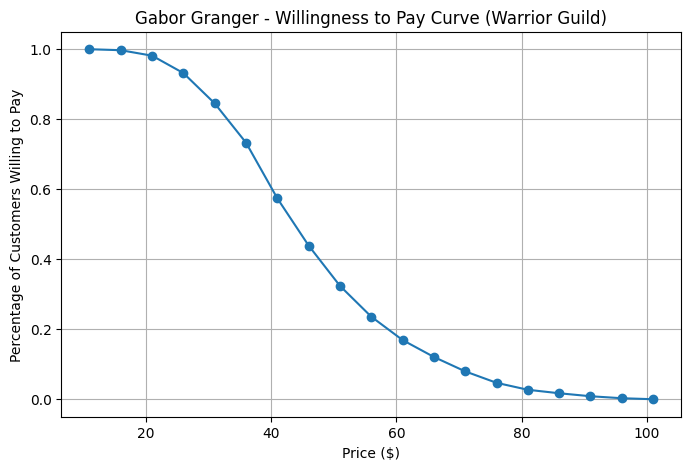

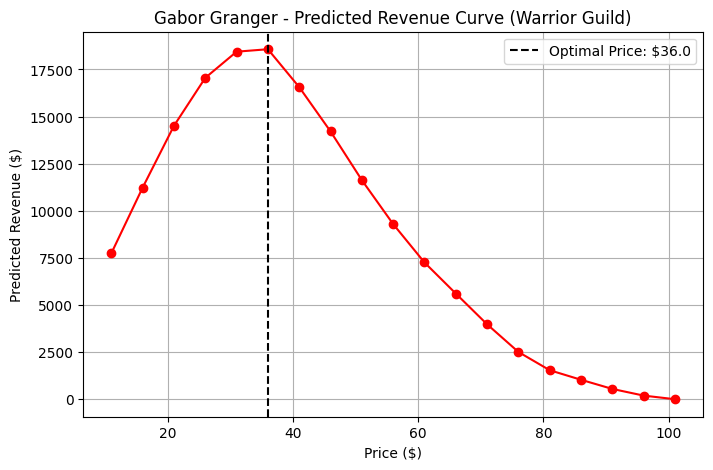


The ideal price point for Warrior Guild to maximize revenue is: $36.0


<ipython-input-71-67e44f6298d7>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({


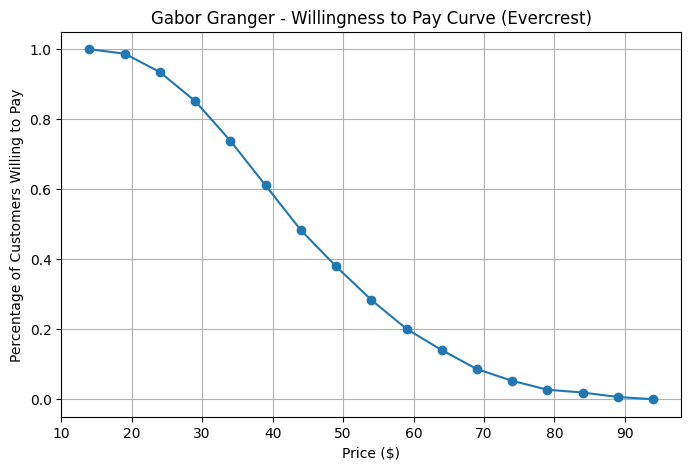

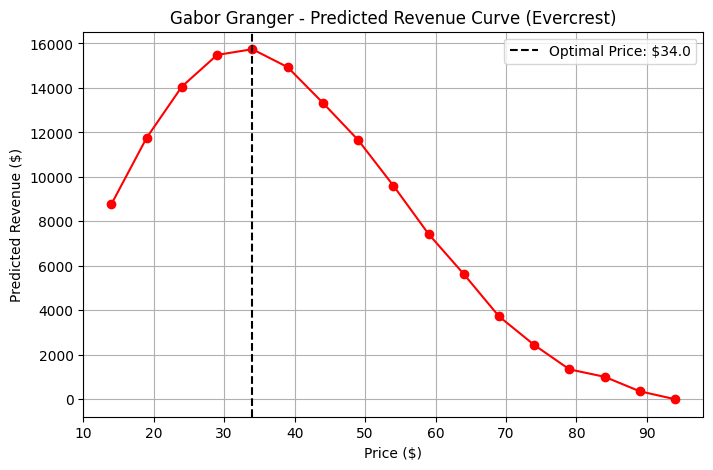


The ideal price point for Evercrest to maximize revenue is: $34.0


<ipython-input-71-67e44f6298d7>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({


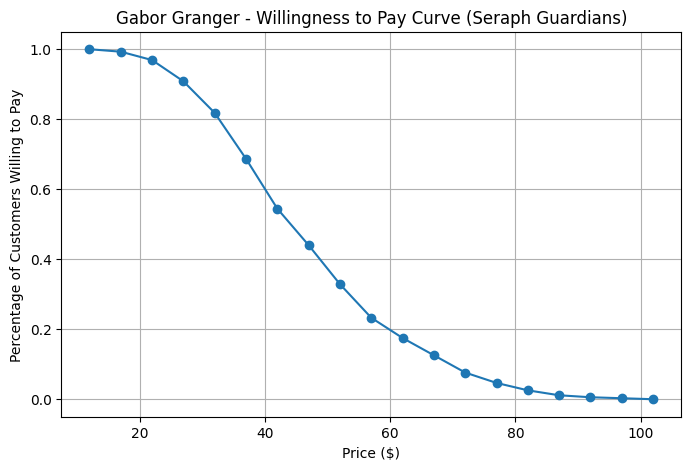

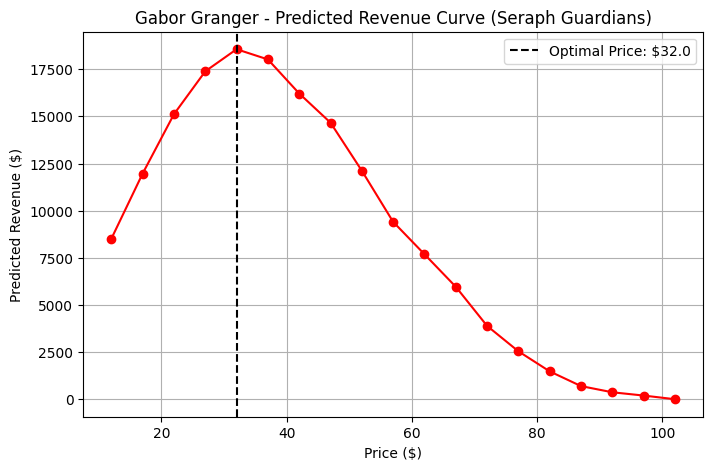


The ideal price point for Seraph Guardians to maximize revenue is: $32.0

### Cumulative WTP and Revenue for All Games ###

Warrior Guild:
    price  per_customers_wtp  pred_revenue
0    11.0           1.000000        7744.0
1    16.0           0.997159       11232.0
2    21.0           0.981534       14511.0
3    26.0           0.931818       17056.0
4    31.0           0.845170       18445.0
5    36.0           0.732955       18576.0
6    41.0           0.573864       16564.0
7    46.0           0.438920       14214.0
8    51.0           0.323864       11628.0
9    56.0           0.235795        9296.0
10   61.0           0.169034        7259.0
11   66.0           0.120739        5610.0
12   71.0           0.079545        3976.0
13   76.0           0.046875        2508.0
14   81.0           0.026989        1539.0
15   86.0           0.017045        1032.0
16   91.0           0.008523         546.0
17   96.0           0.002841         192.0
18  101.0           0.000000           0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the games to analyze
games = ["Warrior Guild", "Evercrest", "Seraph Guardians"]

# Store results for each game
game_results = {}

for game in games:
    # Filter data for the current game
    product_data = survey_data[survey_data['gg.game.presented'] == game][['gg.maxprice']].dropna()

    # Skip game if no valid price responses exist
    if product_data.empty:
        print(f"Skipping {game} due to lack of data.")
        continue

    # Create cumulative willingness-to-pay (WTP) data
    cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

    for price in np.arange(product_data['gg.maxprice'].min(), product_data['gg.maxprice'].max() + 5, 5):
        num_respondents_wtp = sum(product_data['gg.maxprice'] >= price)
        cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
            'price': [price],
            'per_customers_wtp': [num_respondents_wtp / len(product_data)],
            'pred_revenue': [num_respondents_wtp * price]
        })], ignore_index=True)

    # Identify the ideal price point (max predicted revenue)
    ideal_price = cumulative_wtp.loc[cumulative_wtp['pred_revenue'].idxmax(), 'price']

    # Store results
    game_results[game] = {
        "cumulative_wtp": cumulative_wtp,
        "ideal_price": ideal_price
    }

    # Plot: Percentage of customers willing to pay at each price
    plt.figure(figsize=(8, 5))
    plt.plot(cumulative_wtp['price'], cumulative_wtp['per_customers_wtp'], marker='o', linestyle='-')
    plt.xlabel("Price ($)")
    plt.ylabel("Percentage of Customers Willing to Pay")
    plt.title(f"Gabor Granger - Willingness to Pay Curve ({game})")
    plt.grid(True)
    plt.show()

    # Plot: Predicted revenue as a function of price
    plt.figure(figsize=(8, 5))
    plt.plot(cumulative_wtp['price'], cumulative_wtp['pred_revenue'], marker='o', linestyle='-', color='r')
    plt.xlabel("Price ($)")
    plt.ylabel("Predicted Revenue ($)")
    plt.title(f"Gabor Granger - Predicted Revenue Curve ({game})")
    plt.axvline(x=ideal_price, color='black', linestyle='--', label=f'Optimal Price: ${ideal_price}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the ideal price point
    print(f"\nThe ideal price point for {game} to maximize revenue is: ${ideal_price}")

# Display cumulative WTP and revenue for all games
print("\n### Cumulative WTP and Revenue for All Games ###")
for game, result in game_results.items():
    print(f"\n{game}:")
    print(result["cumulative_wtp"])


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure 'gg.maxprice' and 'Cluster' are numeric
survey_data['gg.maxprice'] = pd.to_numeric(survey_data['gg.maxprice'], errors='coerce')
survey_data['Cluster'] = pd.to_numeric(survey_data['Cluster'], errors='coerce')

# Drop rows with missing values in relevant columns
survey_data = survey_data.dropna(subset=['gg.maxprice', 'Cluster'])

# Define the games to analyze
games = ["Warrior Guild", "Evercrest", "Seraph Guardians"]

# Store regression results for each game
regression_results = {}

for game in games:
    # Filter dataset for the current game
    game_data = survey_data[survey_data['gg.game.presented'] == game][['gg.maxprice', 'Cluster']].dropna()

    # Skip if no valid data exists
    if game_data.empty:
        print(f"Skipping regression analysis for {game} due to lack of data.")
        continue

    # Convert 'Cluster' to integer type
    game_data['Cluster'] = game_data['Cluster'].astype(int)

    # One-hot encode 'Cluster' to create dummy variables
    X = pd.get_dummies(game_data['Cluster'], prefix='Cluster', drop_first=True).astype(float)

    # Convert X and y to numeric explicitly
    X = X.apply(pd.to_numeric, errors='coerce')
    y = pd.to_numeric(game_data['gg.maxprice'], errors='coerce')

    # Drop rows with missing values (if any remain)
    X = X.dropna()
    y = y.loc[X.index]

    # Add constant for regression
    X = sm.add_constant(X)

    # Ensure that X and y contain only numeric values
    if not np.issubdtype(X.dtypes.values.any(), np.number) or not np.issubdtype(y.dtype, np.number):
        print(f"Skipping regression for {game} due to non-numeric values in data.")
        continue

    # Fit linear regression model
    model = sm.OLS(y, X).fit()

    # Store results
    regression_results[game] = model

    # Print regression summary
    print(f"\n### Regression Analysis for {game} ###")
    print(model.summary())

# Identify the most and least interested segments for each game
segment_interest = {}

for game, model in regression_results.items():
    # Extract coefficients for clusters (higher coefficient means higher willingness to pay)
    cluster_coefficients = model.params.drop('const').sort_values(ascending=False)

    # Identify most and least interested segments
    most_interested = cluster_coefficients.idxmax().replace("Cluster_", "Segment ")
    least_interested = cluster_coefficients.idxmin().replace("Cluster_", "Segment ")

    segment_interest[game] = {
        "Most Interested Segment": most_interested,
        "Least Interested Segment": least_interested,
        "Highest Coefficient": cluster_coefficients.max(),
        "Lowest Coefficient": cluster_coefficients.min()
    }

# Convert results to DataFrame for better visualization
segment_interest_df = pd.DataFrame(segment_interest).T

# Display the results
print("\n### Segment Interest Summary for Each Game ###")
print(segment_interest_df)



### Regression Analysis for Warrior Guild ###
                            OLS Regression Results                            
Dep. Variable:            gg.maxprice   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     10.29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           4.22e-08
Time:                        03:48:21   Log-Likelihood:                -2904.0
No. Observations:                 704   AIC:                             5818.
Df Residuals:                     699   BIC:                             5841.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define total Steam customer base interested in these games
total_customers = 10_000_000

# Define purchase probability (30% of respondents who indicated willingness to pay)
purchase_probability = 0.30

# Store revenue projections for each game
revenue_results = {}

# Recompute Gabor Granger WTP analysis for each game
game_results = {}

for game in ["Warrior Guild", "Evercrest", "Seraph Guardians"]:
    # Filter data for the current game
    product_data = survey_data[survey_data['gg.game.presented'] == game][['gg.maxprice']].dropna()

    # Skip game if no valid price responses exist
    if product_data.empty:
        print(f"Skipping {game} due to lack of data.")
        continue

    # Create cumulative willingness-to-pay (WTP) data
    cumulative_wtp = []

    for price in np.arange(product_data['gg.maxprice'].min(), product_data['gg.maxprice'].max() + 5, 5):
        num_respondents_wtp = sum(product_data['gg.maxprice'] >= price)
        cumulative_wtp.append({
            'price': price,
            'per_customers_wtp': num_respondents_wtp / len(product_data),
            'pred_revenue': num_respondents_wtp * price
        })

    # Convert list to DataFrame
    cumulative_wtp = pd.DataFrame(cumulative_wtp)

    # Identify the ideal price point (max predicted revenue)
    ideal_price = cumulative_wtp.loc[cumulative_wtp['pred_revenue'].idxmax(), 'price']

    # Store results
    game_results[game] = {
        "cumulative_wtp": cumulative_wtp,
        "ideal_price": ideal_price
    }

# Calculate revenue projections
for game in game_results.keys():
    cumulative_wtp = game_results[game]["cumulative_wtp"]
    ideal_price = game_results[game]["ideal_price"]

    # Identify the percentage of survey respondents willing to pay the ideal price
    willing_to_pay_percentage = cumulative_wtp.loc[cumulative_wtp['price'] == ideal_price, 'per_customers_wtp'].values[0]

    # Estimate total potential buyers based on survey proportion and Steam customer base
    expected_buyers = total_customers * willing_to_pay_percentage * purchase_probability

    # Calculate gross and net revenue
    gross_revenue = expected_buyers * ideal_price  # Total revenue if all interested buyers purchase
    net_revenue = gross_revenue * purchase_probability  # Adjusted for actual purchase probability

    # Store results
    revenue_results[game] = {
        "Ideal Price ($)": ideal_price,
        "Willing to Pay (%)": willing_to_pay_percentage * 100,
        "Expected Buyers": expected_buyers,
        "Gross Revenue ($)": gross_revenue,
        "Net Revenue ($)": net_revenue
    }

# Convert results to DataFrame for better visualization
revenue_df = pd.DataFrame(revenue_results).T

# Display the results in Jupyter Notebook
print("\n### Revenue Projections for Each Game ###")
display(revenue_df)



### Revenue Projections for Each Game ###


,Ideal Price ($),Willing to Pay (%),Expected Buyers,Gross Revenue ($),Net Revenue ($)
Warrior Guild,36.0,73.295455,2.198864e+06,7.915909e+07,2.374773e+07
Evercrest,34.0,73.843700,2.215311e+06,7.532057e+07,2.259617e+07
Seraph Guardians,32.0,81.805360,2.454161e+06,7.853315e+07,2.355994e+07


In [ ]:
import numpy as np
import pandas as pd

# Define total Steam customer base interested in these games
total_customers = 10_000_000

# Define purchase probability (30% of respondents who indicated willingness to pay)
purchase_probability = 0.30

# Financial parameters
royalty_rate = 0.05  # 5% royalties to the original developer

# Steam revenue share structure
steam_tiers = [(10_000_000, 0.30), (50_000_000, 0.25), (float("inf"), 0.20)]

# Store revenue projections for each game
revenue_results = {}

# Recompute Gabor Granger WTP analysis for each game
game_results = {}

for game in ["Warrior Guild", "Evercrest", "Seraph Guardians"]:
    # Filter data for the current game
    product_data = survey_data[survey_data['gg.game.presented'] == game][['gg.maxprice']].dropna()

    # Skip game if no valid price responses exist
    if product_data.empty:
        print(f"Skipping {game} due to lack of data.")
        continue

    # Create cumulative willingness-to-pay (WTP) data
    cumulative_wtp = []

    for price in np.arange(product_data['gg.maxprice'].min(), product_data['gg.maxprice'].max() + 5, 5):
        num_respondents_wtp = sum(product_data['gg.maxprice'] >= price)
        cumulative_wtp.append({
            'price': price,
            'per_customers_wtp': num_respondents_wtp / len(product_data),
            'pred_revenue': num_respondents_wtp * price
        })

    # Convert list to DataFrame
    cumulative_wtp = pd.DataFrame(cumulative_wtp)

    # Identify the ideal price point (max predicted revenue)
    ideal_price = cumulative_wtp.loc[cumulative_wtp['pred_revenue'].idxmax(), 'price']

    # Store results
    game_results[game] = {
        "cumulative_wtp": cumulative_wtp,
        "ideal_price": ideal_price
    }

# Calculate revenue projections with correct net revenue calculations
for game in game_results.keys():
    cumulative_wtp = game_results[game]["cumulative_wtp"]
    ideal_price = game_results[game]["ideal_price"]

    # Identify the percentage of survey respondents willing to pay the ideal price
    willing_to_pay_percentage = cumulative_wtp.loc[cumulative_wtp['price'] == ideal_price, 'per_customers_wtp'].values[0]

    # Estimate total potential buyers based on survey proportion and Steam customer base
    expected_buyers = total_customers * willing_to_pay_percentage * purchase_probability

    # Calculate gross revenue
    gross_revenue = expected_buyers * ideal_price

    # Apply Steam revenue share tiers
    remaining_revenue = gross_revenue
    net_revenue_before_royalties = 0  # Revenue after Steam fees but before royalties
    prev_threshold = 0

    for threshold, rate in steam_tiers:
        if remaining_revenue <= 0:
            break

        taxable_revenue = min(remaining_revenue, threshold - prev_threshold)
        net_revenue_before_royalties += taxable_revenue * (1 - rate)
        remaining_revenue -= taxable_revenue
        prev_threshold = threshold

    # Calculate Steam fees
    steam_fees = gross_revenue - net_revenue_before_royalties

    # Deduct developer royalties (5% of gross revenue)
    royalty_costs = gross_revenue * royalty_rate

    # Compute net revenue (before fixed costs)
    net_revenue = net_revenue_before_royalties - royalty_costs

    # Store results
    revenue_results[game] = {
        "Ideal Price ($)": ideal_price,
        "Willing to Pay (%)": willing_to_pay_percentage * 100,
        "Expected Buyers": expected_buyers,
        "Gross Revenue ($)": gross_revenue,
        "Steam Fees ($)": steam_fees,
        "Net Revenue Before Royalties ($)": net_revenue_before_royalties,
        "Royalty Costs ($)": royalty_costs,
        "Net Revenue ($)": net_revenue  #
    }

# Convert results to DataFrame for better visualization
revenue_df = pd.DataFrame(revenue_results).T

# Display the results
print("\n### Updated Net Revenue Analysis for Each Game ###")
print(revenue_df)



### Updated Net Revenue Analysis for Each Game ###
                  Ideal Price ($)  Willing to Pay (%)  Expected Buyers  \
Warrior Guild                36.0           73.295455     2.198864e+06   
Evercrest                    34.0           73.843700     2.215311e+06   
Seraph Guardians             32.0           81.805360     2.454161e+06   

                  Gross Revenue ($)  Steam Fees ($)  \
Warrior Guild          7.915909e+07    1.883182e+07   
Evercrest              7.532057e+07    1.806411e+07   
Seraph Guardians       7.853315e+07    1.870663e+07   

                  Net Revenue Before Royalties ($)  Royalty Costs ($)  \
Warrior Guild                         6.032727e+07       3.957955e+06   
Evercrest                             5.725646e+07       3.766029e+06   
Seraph Guardians                      5.982652e+07       3.926657e+06   

                  Net Revenue ($)  
Warrior Guild        5.636932e+07  
Evercrest            5.349043e+07  
Seraph Guardians     5.589986

In [ ]:
count_values = survey_data['Segment_Label'].value_counts()
print(count_values)



Segment_Label
Strategic Thinkers & Mastery Seekers    514
Goal-Oriented & Structured Players      441
Chaos & Destruction Enthusiasts         428
Casual & Progress-Oriented Players      331
Gameplay-Driven Action Seekers          326
Name: count, dtype: int64


# Question 5

In [ ]:
import pandas as pd

# Load the survey data
file_path = "/content/Athena_survey_data-edited2.xlsx"
survey_data = pd.read_excel(file_path)

# Extract relevant ranking columns
ranking_columns = [
    "rank.WarriorGuild",
    "rank.SeraphGuardians",
    "rank.Evercrest",
    "rank.DevilsGate",
    "rank.Marksman",
    "rank.QuestoftheTitan"
]

# Count how many times each game was ranked as the top choice (rank = 1)
market_share_counts = survey_data[ranking_columns].apply(lambda x: (x == 1).sum())

# Convert to percentage market share
market_share_percentage = (market_share_counts / market_share_counts.sum()) * 100

# Convert results into a DataFrame for display
market_share_df = pd.DataFrame({
    "Game": market_share_percentage.index.str.replace("rank.", ""),
    "Market Share (%)": market_share_percentage.values
})

# Display the market share results
print(market_share_df)



              Game  Market Share (%)
0     WarriorGuild         13.177227
1  SeraphGuardians         50.045914
2        Evercrest          9.779614
3       DevilsGate         18.595041
4         Marksman          2.295684
5  QuestoftheTitan          6.106520
